# Performance - Final

### Preamble

In [1]:
SYS_PATH = 'C:/Users/mark/Documents/GitHub/honours/dev/package/'
SAVE_PATH = r"C:/Users/mark/Documents/GitHub/honours/submissions/thesis-original"
LOAD_PATH = r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/temp/output.db"

In [2]:
#standard imports
import sys
import numpy as np
import scipy.stats as stats
import pandas as pd
from datetime import date, timedelta
import math
from itertools import chain

#third party imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.ticker as tkr
import seaborn as sns
from sklearn import metrics

In [286]:
import importlib
import sys; sys.path.append(SYS_PATH)
import analysis.helper as helper
import analysis.autoVC2 as vc
importlib.reload(helper)
importlib.reload(vc)
%matplotlib inline

In [4]:
TINY_SIZE, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE  = 12, 16, 18, 30
plt.style.use(['seaborn-white', 'seaborn-paper'])
sns.set_palette("colorblind")
rcParams['font.family'] = 'serif' 
rcParams['font.serif'] = 'CMU Serif' 
rcParams['font.weight'] = 'bold'
rcParams['font.size'] = SMALL_SIZE #default font size
rcParams['axes.titlesize'] =SMALL_SIZE   # fontsize of the axes title
rcParams['axes.labelsize'] =MEDIUM_SIZE    # fontsize of the x and y labels
rcParams['xtick.labelsize'] =SMALL_SIZE    # fontsize of the tick labels
rcParams['ytick.labelsize'] =SMALL_SIZE   # fontsize of the tick labels
rcParams['legend.fontsize'] =SMALL_SIZE    # legend fontsize
rcParams['figure.titlesize'] =BIGGER_SIZE  # fontsize of the figure title
rcParams['figure.figsize'] = (8,3)
pd.set_option('precision',3)
outline_bars = dict(linewidth = 1.25, edgecolor = '.15')

### Performance variation by slice date

In [9]:
reload = False

In [10]:
chart_id = "figures/evaluation/performance_slice"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [11]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(33, "evaluate")
    data = data[["F1","MCC","PRC","ROC", "feature_date_str", "forecast_window_years"]]
    data = data.loc[data["forecast_window_years"] == "2 Years"]
    total = pd.DataFrame()
    for metric in ["F1","MCC","PRC","ROC"]:
        temp = data[[metric,"feature_date_str"]]
        temp = temp.rename(index=str, columns={metric: "Score"})
        temp["Metric"] = metric
        total = pd.concat([temp, total], ignore_index=True)
    data = total
    data.to_pickle(pickle_path)

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor


In [18]:
x = "Metric"
y = "Score"
hue = "feature_date_str"
order = ["ROC", "PRC", "MCC", "F1"]
hue_order = data.groupby(hue)[y].mean().index.sort_values(ascending=True).tolist()

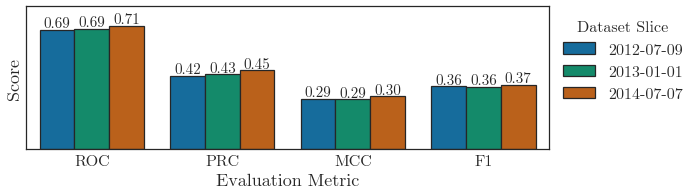

In [22]:
f = plt.figure()
ax = sns.barplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, ci =None, **outline_bars)
helper.auto_label(ax, fmt='{:,.2f}', size=SMALL_SIZE-1)
ax.set_ylabel("Score")
ax.set_xlabel("Evaluation Metric")
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title="Dataset Slice")
plt.tight_layout()

In [23]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Performance by forecast window

In [31]:
reload = True

In [32]:
chart_id = "figures/evaluation/performance_window"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [33]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(33, "evaluate")
    data = data[["F1","MCC","PRC","ROC", "feature_date_str", "forecast_window_years"]]
    total = pd.DataFrame()
    mtrics = ["F1","MCC","PRC","ROC"]
    for metric in mtrics:
        temp = data[[metric,"feature_date_str", "forecast_window_years"]]
        temp = temp.rename(index=str, columns={metric: "Score"})
        temp["Metric"] = metric
        total = pd.concat([temp, total], ignore_index=True)
    data = total
    data.to_pickle(pickle_path)

In [34]:
x = "Metric" 
y = "Score"
hue = "forecast_window_years"
order = ["ROC", "PRC", "MCC", "F1"]
hue_order = ["2 Years", "3 Years", "4 Years"]

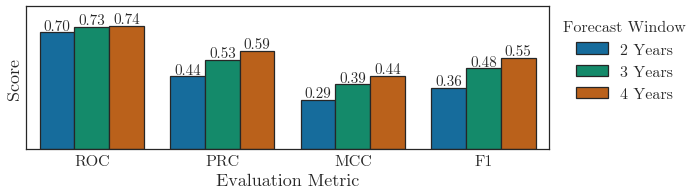

In [35]:
f = plt.figure()
ax = sns.barplot(data=data, x=x, y=y, hue=hue, order=order, hue_order=hue_order, ci=None, **outline_bars)
helper.auto_label(ax, fmt='{:,.2f}', size=SMALL_SIZE-1)
ax.set_ylabel("Score")
ax.set_xlabel("Evaluation Metric")
plt.legend(bbox_to_anchor=(1,1), loc='upper left',title="Forecast Window")
plt.tight_layout()

In [36]:
output_path =  "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Performance by developmental stage

In [37]:
reload = True

In [38]:
chart_id = "figures/evaluation/performance_stage"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [39]:
def get_set(n, name, individual=True):
    data = helper.get_results(*n)
    if individual: stage = "feature_stage_single"
    else: stage = "feature_stage"
    data = data.loc[data["forecast_window_years"] == "4 Years"].reset_index(drop=True)
    data = data[["Y_Pred", "Y_True","feature_date_str", stage]]
    data = helper.get_feature_values(data)
    results = helper.feature_function(data, metrics.f1_score, group = [stage])
    overall = helper.feature_function(data, metrics.f1_score)
    results["Overall"] = overall
    if type(results) is pd.Series: results = results.to_frame()
    results["method"] = name
    return results

In [40]:
def get_data():
    results1 = get_set((33, "evaluate"), "Combined", individual=False)
    results2 = get_set((34, "evaluate"), "Individual", individual=True)
    results = pd.concat([results1, results2], axis=0)
    results = results.reset_index(drop=False)
    results = results.rename(index=str, columns={0:"score","index":"stage"})
    data = results
    return data

In [41]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

In [42]:
x = "stage"
y = "score"
hue = "method"
hue_order = ['Combined', "Individual"]

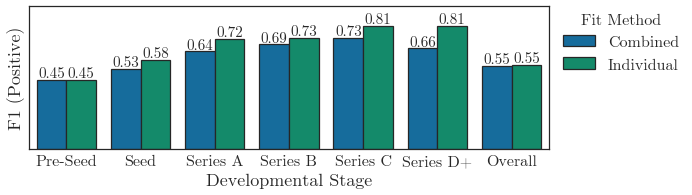

In [43]:
f = plt.figure()
ax = sns.barplot(data=data, x=x, y=y, hue=hue, hue_order=hue_order, **outline_bars)
helper.auto_label(ax, fmt='{:,.2f}',size=SMALL_SIZE-1)
ax.set_xlabel("Developmental Stage")
ax.set_ylabel("F1 (Positive)")
plt.legend(bbox_to_anchor=(1,1.05), title="Fit Method")
plt.tight_layout()

In [44]:
output_path = "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Performance by target outcome

In [240]:
reload = True

In [241]:
chart_id = "figures/evaluation/performance_outcome"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [242]:
def get_data():
    data = helper.get_results(35, "evaluate")
    data["label_type"] = data["label_type"].apply(lambda x: x.replace("_"," "))
    data = data[["Y_Pred", "Y_True", "label_type","forecast_window_years"]]
    data = helper.get_feature_values(data)
    results = helper.feature_function(data, metrics.f1_score, group = ["forecast_window_years","label_type"])
    if type(results) is pd.Series: results = results.to_frame()
    results = results.reset_index(drop=False)
    results = results.rename(index=str, columns={0:"score","index":"label_type"})
    data = results
    return data

In [243]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

In [244]:
x = "label_type"
y = "score"
hue= "forecast_window_years"
order = ["Extra Stage", "Extra Round", "Exit", "Acquisition", "IPO"]

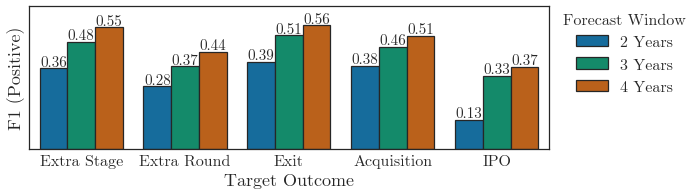

In [245]:
f = plt.figure()
ax = sns.barplot(data=data, x=x, y=y, hue=hue, order=order, **outline_bars)
helper.auto_label(ax, fmt='{:,.2f}',size=SMALL_SIZE-1)
ax.set_xlabel("Target Outcome")
ax.set_ylabel("F1 (Positive)")
plt.legend(bbox_to_anchor=(1,1.05), title="Forecast Window")
plt.tight_layout()

In [246]:
output_path = "{}/{}.pdf".format(SAVE_PATH, chart_id)
f.savefig(output_path, bbox_inches="tight")

### Classification report by slice date

In [232]:
reload=True

In [233]:
chart_id = "tables/evaluation/clf_report_slice"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [234]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(33, "evaluate")
    data["feature_date_year"] = data["feature_date"].apply(lambda x: x.year)
    data = data.loc[data["forecast_window_years"] == "2 Years"].reset_index(drop=True)
    data = data[["Y_Pred", "Y_True", "feature_date_year"]]
    data = helper.get_feature_values(data)
    data.to_pickle(pickle_path)

In [235]:
group = ["feature_date_year"]
cl_reports = helper.feature_function(data, metrics.classification_report, group = group)
cf_matrix = helper.feature_function(data, metrics.confusion_matrix, group = group)
acc_scores = helper.feature_function(data, metrics.accuracy_score, group = group)
for i, (index, rep) in enumerate(cl_reports.iteritems()):
    print(index)
    print("{0:.2f}".format(acc_scores.tolist()[i]))
    print(cf_matrix.tolist()[i])
    print(rep)

2012
0.82
[[93690 15622]
 [ 5659  6058]]
             precision    recall  f1-score   support

          0       0.94      0.86      0.90    109312
          1       0.28      0.52      0.36     11717

avg / total       0.88      0.82      0.85    121029

2013
0.81
[[91380 17737]
 [ 5246  6467]]
             precision    recall  f1-score   support

          0       0.95      0.84      0.89    109117
          1       0.27      0.55      0.36     11713

avg / total       0.88      0.81      0.84    120830

2014
0.80
[[90007 19305]
 [ 4663  7054]]
             precision    recall  f1-score   support

          0       0.95      0.82      0.88    109312
          1       0.27      0.60      0.37     11717

avg / total       0.88      0.80      0.83    121029



### Classification report by forecast window

In [236]:
reload=True

In [237]:
chart_id = "tables/evaluation/clf_report_window"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [238]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(33, "evaluate")
    data = data[["Y_Pred", "Y_True", "forecast_window_years"]]
    data = helper.get_feature_values(data)
    data.to_pickle(pickle_path)

In [239]:
group = ["forecast_window_years"]
cl_reports = helper.feature_function(data, metrics.classification_report, group = group)
cf_matrix = helper.feature_function(data, metrics.confusion_matrix, group = group)
acc_scores = helper.feature_function(data, metrics.accuracy_score, group = group)
for i, (index, rep) in enumerate(cl_reports.iteritems()):
    print(index)
    print("{0:.2f}".format(acc_scores.tolist()[i]))
    print(cf_matrix.tolist()[i])
    print(rep)

2 Years
0.81
[[275077  52664]
 [ 15568  19579]]
             precision    recall  f1-score   support

          0       0.95      0.84      0.89    327741
          1       0.27      0.56      0.36     35147

avg / total       0.88      0.81      0.84    362888

3 Years
0.81
[[187608  34932]
 [ 14226  22943]]
             precision    recall  f1-score   support

          0       0.93      0.84      0.88    222540
          1       0.40      0.62      0.48     37169

avg / total       0.85      0.81      0.83    259709

4 Years
0.82
[[118240  19406]
 [ 11563  18716]]
             precision    recall  f1-score   support

          0       0.91      0.86      0.88    137646
          1       0.49      0.62      0.55     30279

avg / total       0.84      0.82      0.82    167925



### Classification report by developmental stage

In [224]:
reload=True

In [225]:
chart_id = "tables/evaluation/clf_report_stage"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [226]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(34, "evaluate")
    data = data.loc[data["forecast_window_years"] == "4 Years"].reset_index(drop=True)
    data = data[["Y_Pred", "Y_True", "feature_stage"]]
    data = helper.get_feature_values(data)
    data.to_pickle(pickle_path)

In [227]:
group = ["feature_stage"]
cl_reports = helper.feature_function(data, metrics.classification_report, group = group)
cf_matrix = helper.feature_function(data, metrics.confusion_matrix, group = group)
acc_scores = helper.feature_function(data, metrics.accuracy_score, group = group)
for i, (index, rep) in enumerate(cl_reports.iteritems()):
    print(index)
    print("{0:.2f}".format(acc_scores.tolist()[i]))
    print(cf_matrix.tolist()[i])
    print(rep)

Pre-Seed
0.83
[[94313 13447]
 [ 7357  8681]]
             precision    recall  f1-score   support

          0       0.93      0.88      0.90    107760
          1       0.39      0.54      0.45     16038

avg / total       0.86      0.83      0.84    123798

Seed
0.81
[[16921  2771]
 [ 2077  3395]]
             precision    recall  f1-score   support

          0       0.89      0.86      0.87     19692
          1       0.55      0.62      0.58      5472

avg / total       0.82      0.81      0.81     25164

Series A
0.77
[[4074 1008]
 [ 976 2558]]
             precision    recall  f1-score   support

          0       0.81      0.80      0.80      5082
          1       0.72      0.72      0.72      3534

avg / total       0.77      0.77      0.77      8616

Series B
0.76
[[2394  408]
 [ 902 1780]]
             precision    recall  f1-score   support

          0       0.73      0.85      0.79      2802
          1       0.81      0.66      0.73      2682

avg / total       0.77    

### Classification report by target outcome

In [228]:
reload=True

In [229]:
chart_id = "tables/evaluation/clf_report_outcome"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [230]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = helper.get_results(35, "evaluate")
    data = data.loc[data["forecast_window_years"] == "4 Years"].reset_index(drop=True)
    data = data[["Y_Pred", "Y_True", "label_type"]]
    data = helper.get_feature_values(data)
    data.to_pickle(pickle_path)

In [231]:
group = ["label_type"]
cl_reports = helper.feature_function(data, metrics.classification_report, group = group)
cf_matrix = helper.feature_function(data, metrics.confusion_matrix, group = group)
acc_scores = helper.feature_function(data, metrics.accuracy_score, group = group)
for i, (index, rep) in enumerate(cl_reports.iteritems()):
    print(index)
    print("{0:.2f}".format(acc_scores.tolist()[i]))
    print(cf_matrix.tolist()[i])
    print(rep)

Acquisition
0.91
[[146054  11305]
 [  3065   7501]]
             precision    recall  f1-score   support

        0.0       0.98      0.93      0.95    157359
        1.0       0.40      0.71      0.51     10566

avg / total       0.94      0.91      0.93    167925

Exit
0.92
[[145625   9928]
 [  3755   8617]]
             precision    recall  f1-score   support

        0.0       0.97      0.94      0.96    155553
        1.0       0.46      0.70      0.56     12372

avg / total       0.94      0.92      0.93    167925

Extra Round
0.80
[[121153  25184]
 [  8448  13140]]
             precision    recall  f1-score   support

        0.0       0.93      0.83      0.88    146337
        1.0       0.34      0.61      0.44     21588

avg / total       0.86      0.80      0.82    167925

Extra Stage
0.82
[[118761  18885]
 [ 11677  18602]]
             precision    recall  f1-score   support

        0.0       0.91      0.86      0.89    137646
        1.0       0.50      0.61      0.55     

### Example company profiles and their predictions

In [251]:
reload = True

In [252]:
chart_id = "tables/discussion/example_profiles"
pickle_path = "{}/{}.pkl".format(SAVE_PATH, chart_id)

In [253]:
def get_data():
    data = helper.get_results(33, "evaluate")
    return data

In [254]:
try: 
    if reload: data = pd.read_pickle(pickle_path)
    else: raise IOError
except IOError: 
    data = get_data()
    data.to_pickle(pickle_path)

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor


In [277]:
features_stage_info = dict(
    Age = 'confidence_context_economy_company_age_number',
    FundingRounds = 'confidence_validation_funding_rounds_number',
    FundingRaised = 'confidence_validation_funding_raised_value_total_number',
    SeriesA = 'confidence_validation_funding_round_codes_list_a',
    SeriesB = 'confidence_validation_funding_round_codes_list_b',
    SeriesC = 'confidence_validation_funding_round_codes_list_c',
    SeriesD = 'confidence_validation_funding_round_codes_list_d',
    SeriesE = 'confidence_validation_funding_round_codes_list_e',
    SeriesF = 'confidence_validation_funding_round_codes_list_f',
    SeriesG = 'confidence_validation_funding_round_codes_list_g',
    SeriesH = 'confidence_validation_funding_round_codes_list_h',
    Closed = "keys_company_status_closed_bool",
    Acquired = "keys_company_status_acquired_bool",
    IPO = "keys_company_status_ipo_bool"
)

label_stage_info = dict(
    Age = 'outcome_age_number',
    FundingRounds = 'outcome_funding_rounds_number',
    FundingRaised = 'outcome_funding_raised_value_total_number',
    SeriesA = 'outcome_funding_round_codes_list_a',
    SeriesB = 'outcome_funding_round_codes_list_b',
    SeriesC = 'outcome_funding_round_codes_list_c',
    SeriesD = 'outcome_funding_round_codes_list_d',
    SeriesE = 'outcome_funding_round_codes_list_e',
    SeriesF = 'outcome_funding_round_codes_list_f',
    SeriesG = 'outcome_funding_round_codes_list_g',
    SeriesH = 'outcome_funding_round_codes_list_h',
    Closed = "outcome_closed_bool",
    Acquired = "outcome_acquired_bool",
    IPO = "outcome_ipo_bool"
)

In [317]:
df = pd.read_csv(SYS_PATH+"analysis/output/autoVC/26/evaluate/2013-04-09_2017-04-04.csv")
df = vc.add_stages(df, features_stage_info, "feature")
df = vc.add_stages(df, label_stage_info, "label")
df = vc.apply_constraints(df)
X, y, keys = vc.finalise_dataset(df)
source_data = df

logManager - INFO - add_stages | Started
logManager - INFO - add_stages | Passed | 3.44
logManager - INFO - add_stages | Started
logManager - INFO - add_stages | Passed | 4.58
logManager - INFO - apply_constraints | Started
logManager - INFO - apply_constraints | Passed | 2.93
logManager - INFO - finalise_dataset | Started
logManager - INFO - make_label | Started
Feature: 1.0    41266
2.0     8388
3.0     2872
4.0     1828
5.0      973
6.0      648
Name: keys_company_stage_number, dtype: int64
Outcome:  1.0    35279
 2.0     8978
 8.0     3479
 3.0     2525
 4.0     1734
-1.0     1233
 5.0     1055
 6.0      830
 7.0      601
Name: outcome_stage_number, dtype: int64
Label: 0    45882
1    10093
Name: outcome_extra_stage_bool, dtype: int64
logManager - INFO - make_label | Passed | 0.80
logManager - INFO - filter_features | Started
logManager - INFO - filter_features | Passed | 1.26
logManager - INFO - finalise_dataset | Passed | 2.61


In [318]:
results_data = helper.get_results(33, "evaluate")
results_data = results_data.loc[results_data["forecast_window_years"] == "4 Years"]
results_data = results_data.sample(1).squeeze()

Error: Time
Error: Imputer
Error: Transformer
Error: Scaler
Error: Extractor


In [322]:
data = pd.concat([source_data, pd.Series(results_data["Y_Pred"], index=source_data.index, name="Y_Pred")], axis=1)

In [332]:
data["Missing"] = data.isnull().sum(axis=1)
data["Y_True"] = data["outcome_extra_stage_bool"]
data["Correct"] = np.where(data["outcome_extra_stage_bool"] == data["Y_Pred"], 1, 0)
data.sort_values(by="Missing",ascending=True)[["keys_company_name_id", "keys_company_stage", "outcome_stage", "Y_True", "Y_Pred", "Correct"]].sample(50)

,keys_company_name_id,keys_company_stage,outcome_stage,Y_True,Y_Pred,Correct
6143,rupeewizard.com,Pre-Seed,Pre-Seed,0,0,1
88597,EnergySavvy,Series B,Series D+,1,1,1
7113,Ghostown Studios,Pre-Seed,Pre-Seed,0,0,1
87340,Perpetuum Lab,Pre-Seed,Pre-Seed,0,0,1
4615,Pressdot.net,Pre-Seed,Pre-Seed,0,0,1
84451,ContestDesigns.com,Pre-Seed,Pre-Seed,0,0,1
49166,style36.co.za,Pre-Seed,Pre-Seed,0,0,1
88557,Active-Semi,Seed,Seed,0,1,0
41518,Sigma Infotech,Pre-Seed,Pre-Seed,0,0,1
53304,CareerLeak,Pre-Seed,Pre-Seed,0,0,1


In [345]:
elements = [
    "keys_company_name_id",
    "confidence_context_economy_company_age_number",
    "confidence_validation_funding_raised_value_total_number",
    "confidence_validation_funding_rounds_number",
    "keys_company_stage", 
    "outcome_age_number",
    "outcome_funding_raised_value_total_number",
    "outcome_funding_rounds_number",
    "outcome_stage", 
    "Y_Pred",
    "Y_True", 
    "Correct"]
names = ["ChaCha", "Doctor.com", "Fab", "Mixpanel"]
temp = pd.DataFrame()
for name in names:
    new = data.loc[data["keys_company_name_id"] == name][elements]
    temp = pd.concat([new, temp], axis=0)
temp.T

,34245,98092,11202,21843
keys_company_name_id,Mixpanel,Fab,Doctor.com,ChaCha
confidence_context_economy_company_age_number,3.81,4.27,0.603,7.36
confidence_validation_funding_raised_value_total_number,1.2e+07,1.71e+08,NaN,9.2e+07
confidence_validation_funding_rounds_number,4,8,NaN,8
keys_company_stage,Series A,Series C,Pre-Seed,Series D+
outcome_age_number,7.79,8.26,4.59,11.3
outcome_funding_raised_value_total_number,7.7e+07,3.36e+08,5e+06,9.6e+07
outcome_funding_rounds_number,5,11,3,9
outcome_stage,Series B,Acquired,Series A,Series D+
Y_Pred,1,1,0,1
